In [1]:
# Importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Ocultamos las advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings("ignore")

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# Lo primero que hacemos es cargar el dataframe que vamos a usar
df = pd.read_csv("df_transformado.csv")
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work
0,51,no,NaN,2015.72,NaN,6,3,NaN,1,low,female,NaN,high,executive,research_director,high,NaN,16280.83,42330.17,7,no,13,"3,0",high,full_time,0,NaN,5,good,20,15,15,1972,195370.0,yes
1,52,no,NaN,2063.39,NaN,1,4,life_sciences,2,high,female,NaN,medium,executive,manager,high,NaN,NaN,43331.17,0,NaN,14,"3,0",low,NaN,1,34.0,5,good,33,11,9,1971,199990.0,yes
2,42,no,travel_rarely,1984.25,research_&_development,4,2,technical_degree,3,high,female,NaN,high,executive,manager,very_high,married,NaN,41669.33,1,no,11,"3,0",very_high,NaN,0,22.0,3,NaN,22,11,15,1981,192320.0,yes
3,47,no,travel_rarely,1771.40,NaN,2,4,medical,4,low,male,NaN,high,manager,research_director,high,married,14307.50,37199.50,3,NaN,19,"3,0",medium,full_time,2,NaN,2,NaN,20,5,6,1976,171690.0,no
4,46,no,NaN,1582.77,NaN,3,3,technical_degree,5,low,male,NaN,very_high,manager,sales_executive,low,divorced,12783.92,33238.20,2,no,12,"3,0",very_high,NaN,1,NaN,5,good,19,2,8,1977,NaN,no


In [3]:
df.shape

(1614, 35)

In [4]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'remote_work'],
      dtype='object')

In [5]:
for col in df.columns:
    nulos = df[col].isnull().sum()
    if nulos > 0:
        print(f"{col}: {nulos} nulos")

business_travel: 772 nulos
department: 1312 nulos
education_field: 745 nulos
environment_satisfaction: 100 nulos
hourly_rate: 1210 nulos
marital_status: 651 nulos
monthly_income: 468 nulos
overtime: 676 nulos
performance_rating: 195 nulos
standard_hours: 338 nulos
total_working_years: 526 nulos
work_life_balance: 108 nulos
salary: 274 nulos


In [6]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].describe(include='all'))


--- age ---
count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

--- attrition ---
count     1614
unique       2
top         no
freq      1355
Name: attrition, dtype: object

--- business_travel ---
count               842
unique                3
top       travel_rarely
freq                586
Name: business_travel, dtype: object

--- daily_rate ---
count    1614.000000
mean      669.632150
std       472.352414
min       104.100000
25%       290.040000
50%       556.260000
75%       967.315000
max      2063.390000
Name: daily_rate, dtype: float64

--- department ---
count                        302
unique                         3
top       research_&_development
freq                         196
Name: department, dtype: object

--- distance_from_home ---
count    1614.000000
mean       11.141884
std        10.450560
min         1.000000
25%     

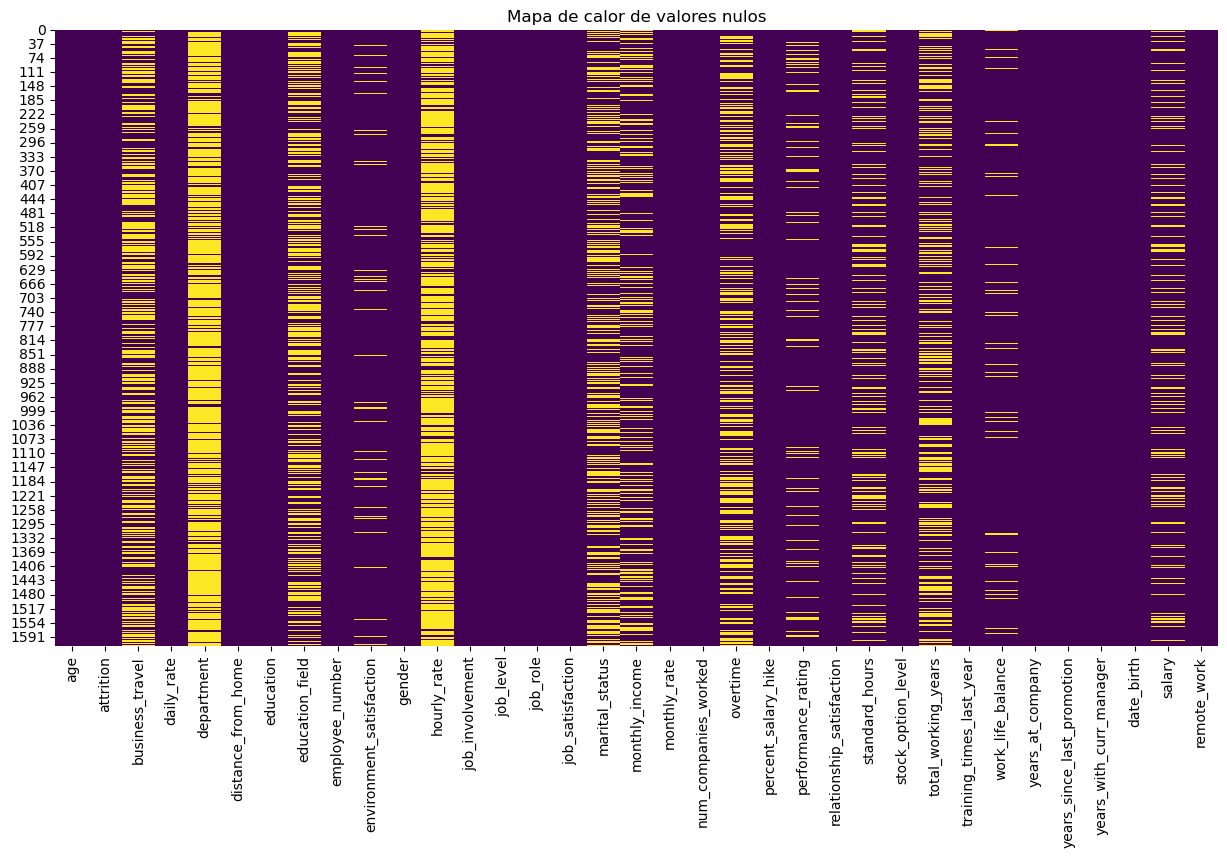

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores nulos")
plt.show()

In [8]:
nulos_porcentaje = df.isnull().mean() * 100
print(nulos_porcentaje[nulos_porcentaje > 0].sort_values(ascending=False))

department                  81.288724
hourly_rate                 74.969021
business_travel             47.831475
education_field             46.158612
overtime                    41.883519
marital_status              40.334572
total_working_years         32.589839
monthly_income              28.996283
standard_hours              20.941760
salary                      16.976456
performance_rating          12.081784
work_life_balance            6.691450
environment_satisfaction     6.195787
dtype: float64


In [9]:
nulos_porcentaje = df.isnull().mean() * 100
print(nulos_porcentaje[nulos_porcentaje > 0].sort_values(ascending=False))

department                  81.288724
hourly_rate                 74.969021
business_travel             47.831475
education_field             46.158612
overtime                    41.883519
marital_status              40.334572
total_working_years         32.589839
monthly_income              28.996283
standard_hours              20.941760
salary                      16.976456
performance_rating          12.081784
work_life_balance            6.691450
environment_satisfaction     6.195787
dtype: float64


In [10]:
# Obtener columnas con nulos
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)

for col in nulos.index:
    print("="*50)
    print(f"Columna: {col}")
    print(f"Tipo de dato: {df[col].dtype}")
    print(f"Nulos: {df[col].isnull().sum()} ({df[col].isnull().mean() * 100:.2f}%)")

    # Mostrar estadísticas según tipo de dato
    if df[col].dtype == 'object':
        print("\nFrecuencia de valores:")
        print(df[col].value_counts(dropna=False).head(10))
    else:
        print("\nEstadísticas numéricas:")
        print(df[col].describe())

    # Pausa para evaluar cada columna antes de continuar
    input("\nPresiona Enter para continuar con la siguiente columna...")


Columna: department
Tipo de dato: object
Nulos: 1312 (81.29%)

Frecuencia de valores:
department
NaN                       1312
research_&_development     196
sales                       91
human_resources             15
Name: count, dtype: int64
Columna: hourly_rate
Tipo de dato: float64
Nulos: 1210 (74.97%)

Estadísticas numéricas:
count    404.000000
mean      83.042302
std       57.548806
min       13.010000
25%       36.250000
50%       69.530000
75%      114.160000
max      255.960000
Name: hourly_rate, dtype: float64
Columna: business_travel
Tipo de dato: object
Nulos: 772 (47.83%)

Frecuencia de valores:
business_travel
NaN                  772
travel_rarely        586
travel_frequently    165
non_travel            91
Name: count, dtype: int64
Columna: education_field
Tipo de dato: object
Nulos: 745 (46.16%)

Frecuencia de valores:
education_field
NaN                 745
life_sciences       349
medical             276
marketing           104
technical_degree     69
other       

In [11]:
# Ver variables numéricas
df.select_dtypes(include='number').columns.tolist()

['age',
 'daily_rate',
 'distance_from_home',
 'education',
 'employee_number',
 'hourly_rate',
 'monthly_income',
 'monthly_rate',
 'num_companies_worked',
 'percent_salary_hike',
 'stock_option_level',
 'total_working_years',
 'training_times_last_year',
 'years_at_company',
 'years_since_last_promotion',
 'years_with_curr_manager',
 'date_birth',
 'salary']

In [12]:
# Ver variables categóricas
df.select_dtypes(include='object').columns.tolist()

['attrition',
 'business_travel',
 'department',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'overtime',
 'performance_rating',
 'relationship_satisfaction',
 'standard_hours',
 'work_life_balance',
 'remote_work']

In [13]:
# Ver variables con fechas
df.select_dtypes(include='datetime').columns.tolist()

[]

## REVISON COLUMNA A COLUMNA

In [14]:
## COLUMNAS CATEGÓRICAS

In [46]:
def cat_plot(df, columns):
    for col in columns:
        absolute_frequency = df[col].value_counts()
        relative_frequency = df[col].value_counts(normalize=True) * 100
        print(relative_frequency)
        # creamos un DataFrame para mostrar ambas tablas
        frequency_table = pd.DataFrame({col: absolute_frequency.index,
                                        'Absolute Frequency': absolute_frequency.values,
                                        'Relative Frequency (%)': relative_frequency.values
                                        })
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
        # Gráfico de barras para la frecuencia absoluta
        sns.barplot(x=col,
                    y='Absolute Frequency',
                    data=frequency_table, ax=axes[0])
        axes[0].set_title(f'Absolute Frequency for {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Absolute Frequency')
        axes[0].tick_params(axis='x', rotation=45)
        # Gráfico de barras para la frecuencia relativa
        sns.barplot(x=col, y='Relative Frequency (%)', data=frequency_table, ax=axes[1])
        axes[1].set_title(f'Relative Frequency for {col}')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Relative Frequency (%)')
        axes[1].tick_params(axis='x', rotation=45)
        plt.tight_layout();

In [16]:
df["business_travel"].info()
print(df["business_travel"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: business_travel
Non-Null Count  Dtype 
--------------  ----- 
842 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB
business_travel
NaN                  772
travel_rarely        586
travel_frequently    165
non_travel            91
Name: count, dtype: int64


business_travel
travel_rarely        69.596200
travel_frequently    19.596200
non_travel           10.807601
Name: proportion, dtype: float64


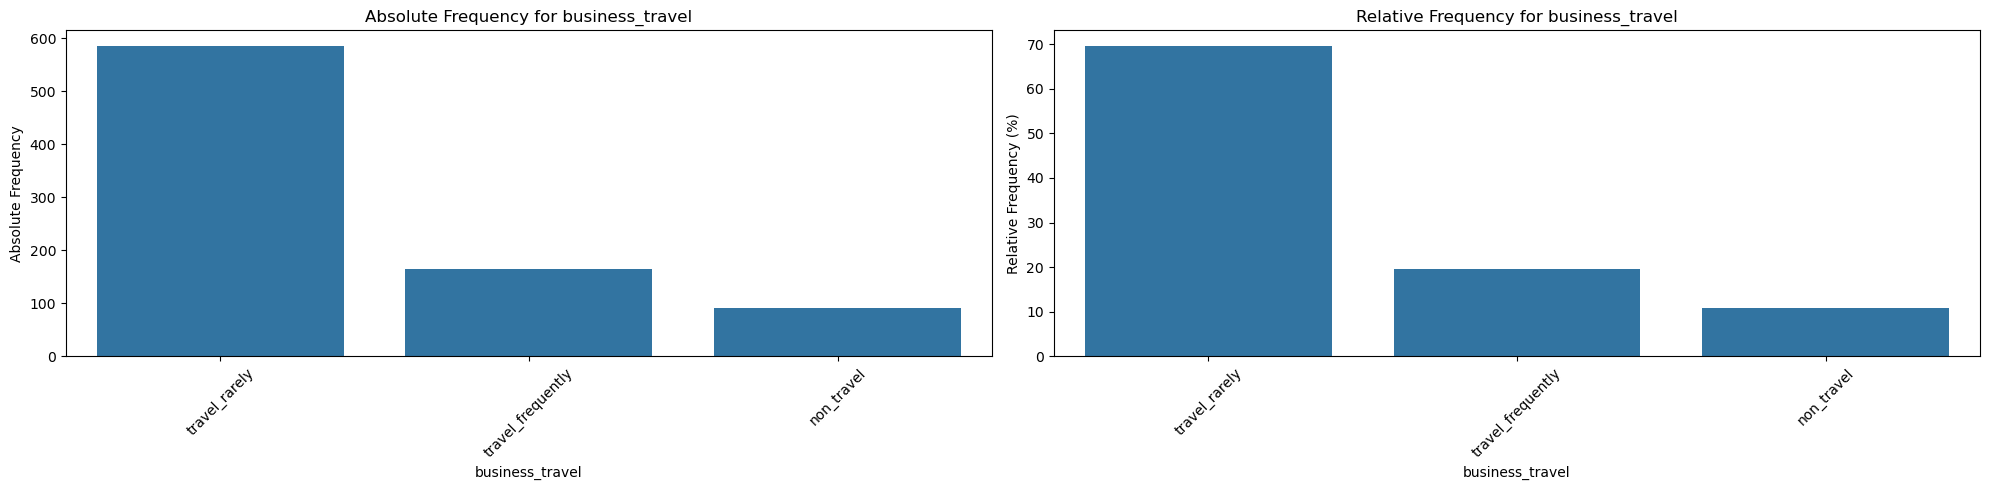

In [47]:
cat_plot(df, ['business_travel'])

Imputamos los nulos con técnicas avanzadas en business_travel porque tiene alto porcentaje de nulos (47.83%)

In [18]:
df["department"].info()
print(df["department"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: department
Non-Null Count  Dtype 
--------------  ----- 
302 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB
department
NaN                       1312
research_&_development     196
sales                       91
human_resources             15
Name: count, dtype: int64


department
research_&_development    64.900662
sales                     30.132450
human_resources            4.966887
Name: proportion, dtype: float64


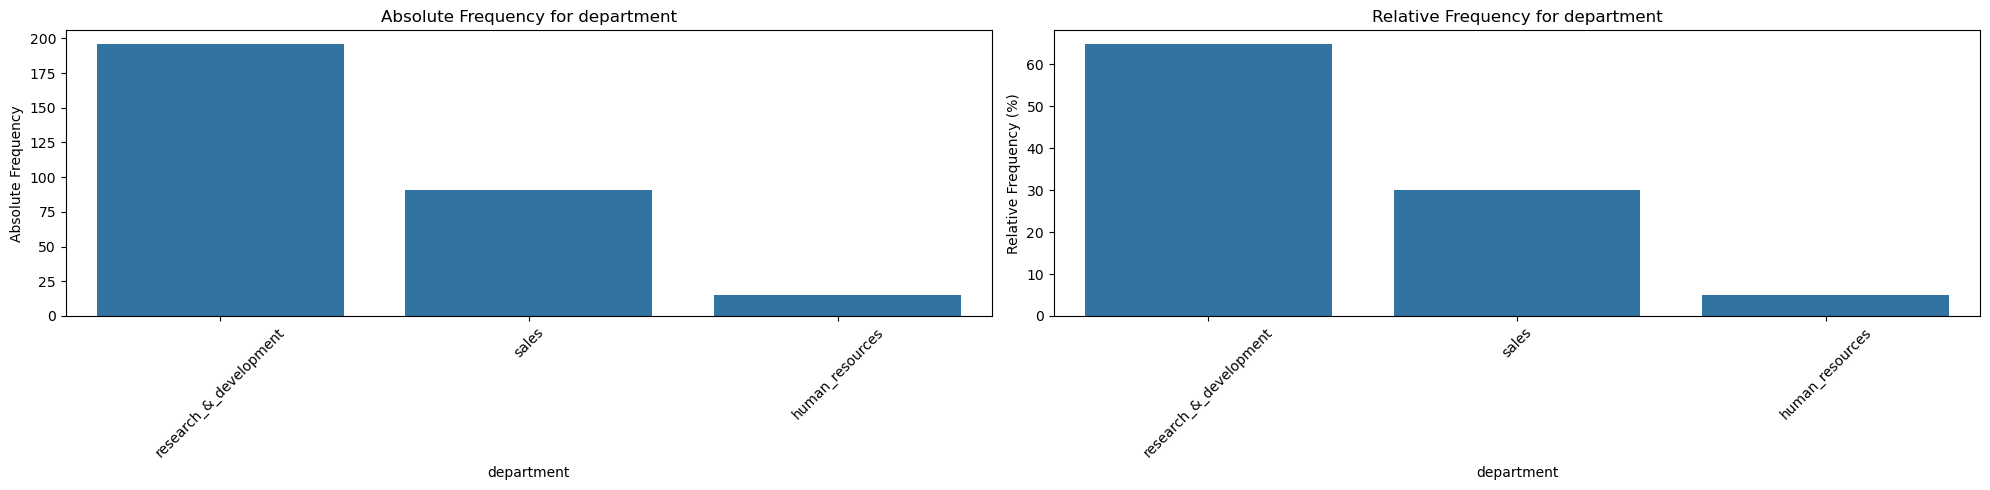

In [48]:
cat_plot(df, ['department'])

Imputamos los nulos con técnicas avanzadas en department porque tiene alto porcentaje de nulos (81.28%)

In [20]:
df["education_field"].info()
print(df["education_field"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: education_field
Non-Null Count  Dtype 
--------------  ----- 
869 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB
education_field
NaN                 745
life_sciences       349
medical             276
marketing           104
technical_degree     69
other                59
human_resources      12
Name: count, dtype: int64


education_field
life_sciences       40.161105
medical             31.760644
marketing           11.967779
technical_degree     7.940161
other                6.789413
human_resources      1.380898
Name: proportion, dtype: float64


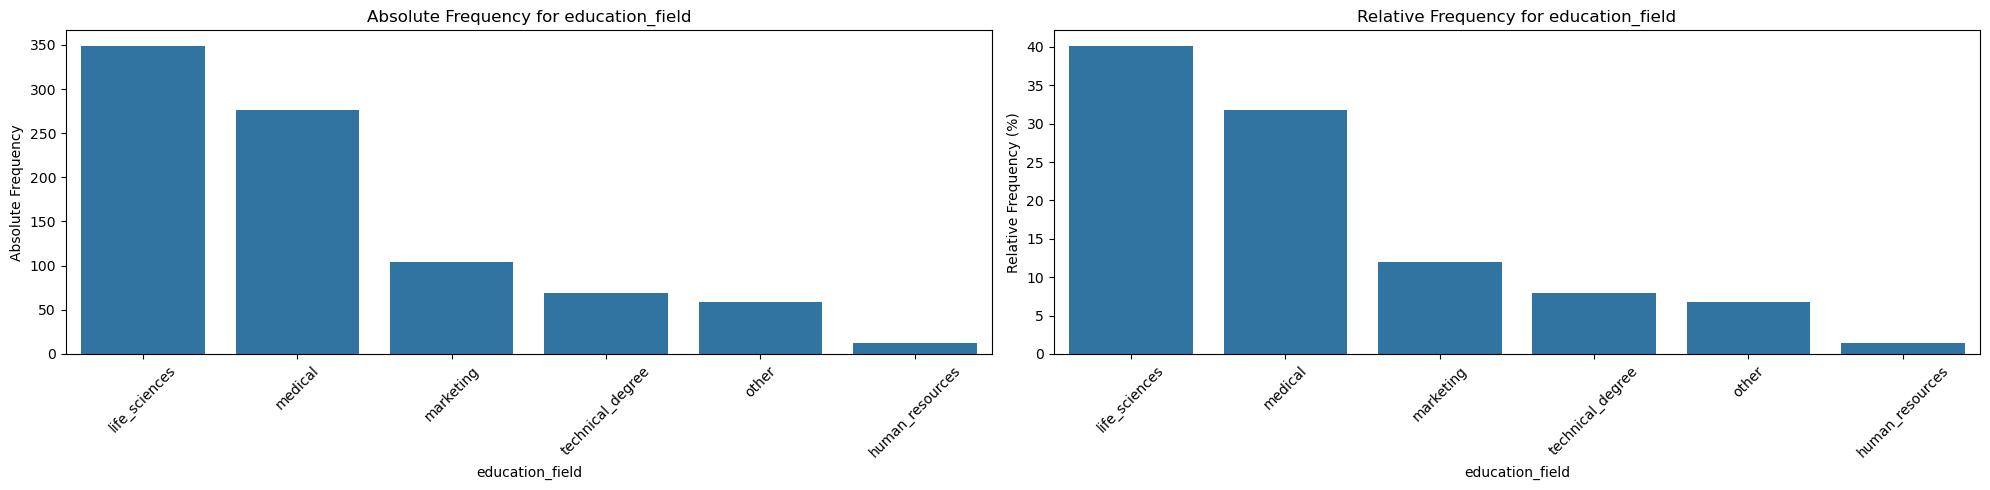

In [49]:
cat_plot(df, ['education_field'])

Imputamos los nulos con técnicas avanzadas en education_fielf porque tiene alto porcentaje de nulos (46.16%) y la moda no es tan determinante

In [22]:
df["marital_status"].info()
print(df["marital_status"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: marital_status
Non-Null Count  Dtype 
--------------  ----- 
963 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB
marital_status
NaN         651
married     439
single      325
divorced    199
Name: count, dtype: int64


marital_status
married     45.586708
single      33.748702
divorced    20.664590
Name: proportion, dtype: float64


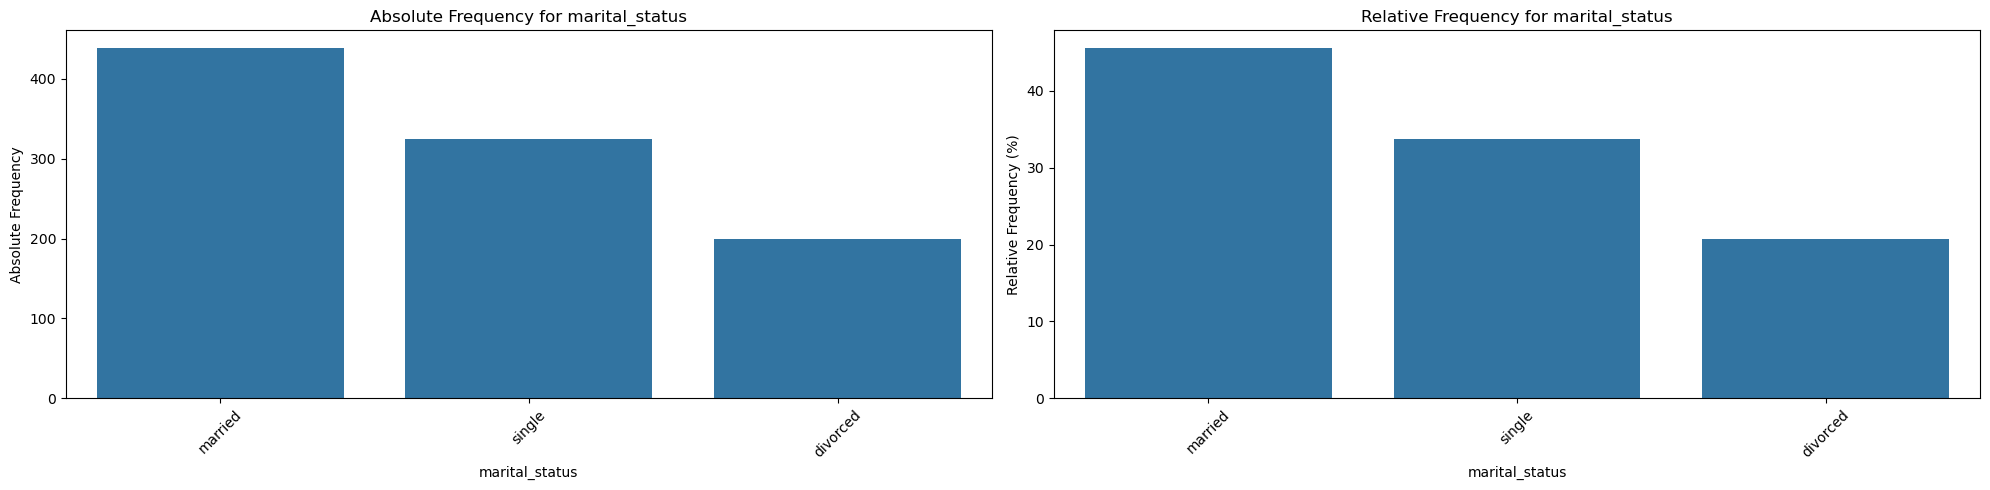

In [50]:
cat_plot(df, ['marital_status'])

Imputamos los nulos con técnicas avanzadas en marital status porque tiene alto porcentaje de nulos (40.33%) y la moda no es tan determinante

In [25]:
df["overtime"].info()
print(df["overtime"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: overtime
Non-Null Count  Dtype 
--------------  ----- 
938 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB
overtime
no     682
NaN    676
yes    256
Name: count, dtype: int64


overtime
no     72.707889
yes    27.292111
Name: proportion, dtype: float64


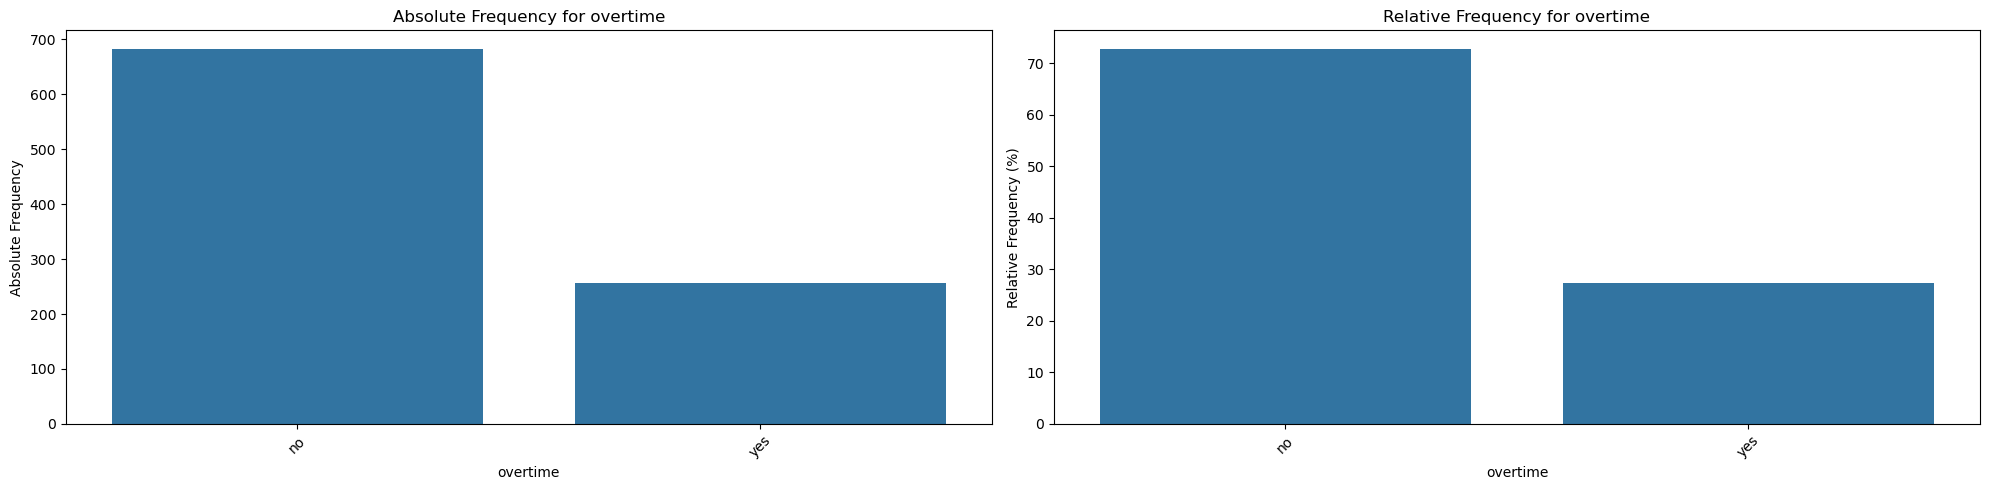

In [51]:
cat_plot(df, ['overtime'])

Imputamos los nulos con la moda en overtime porque tiene alto porcentaje de nulos (41.88%) y la moda es determinante

In [28]:
df["performance_rating"].info()
print(df["performance_rating"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: performance_rating
Non-Null Count  Dtype 
--------------  ----- 
1419 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB
performance_rating
3,0    1205
4,0     214
NaN     195
Name: count, dtype: int64


In [38]:
df["performance_rating"].unique()

array(['3,0', '4,0', nan], dtype=object)

performance_rating
3,0    84.918957
4,0    15.081043
Name: proportion, dtype: float64


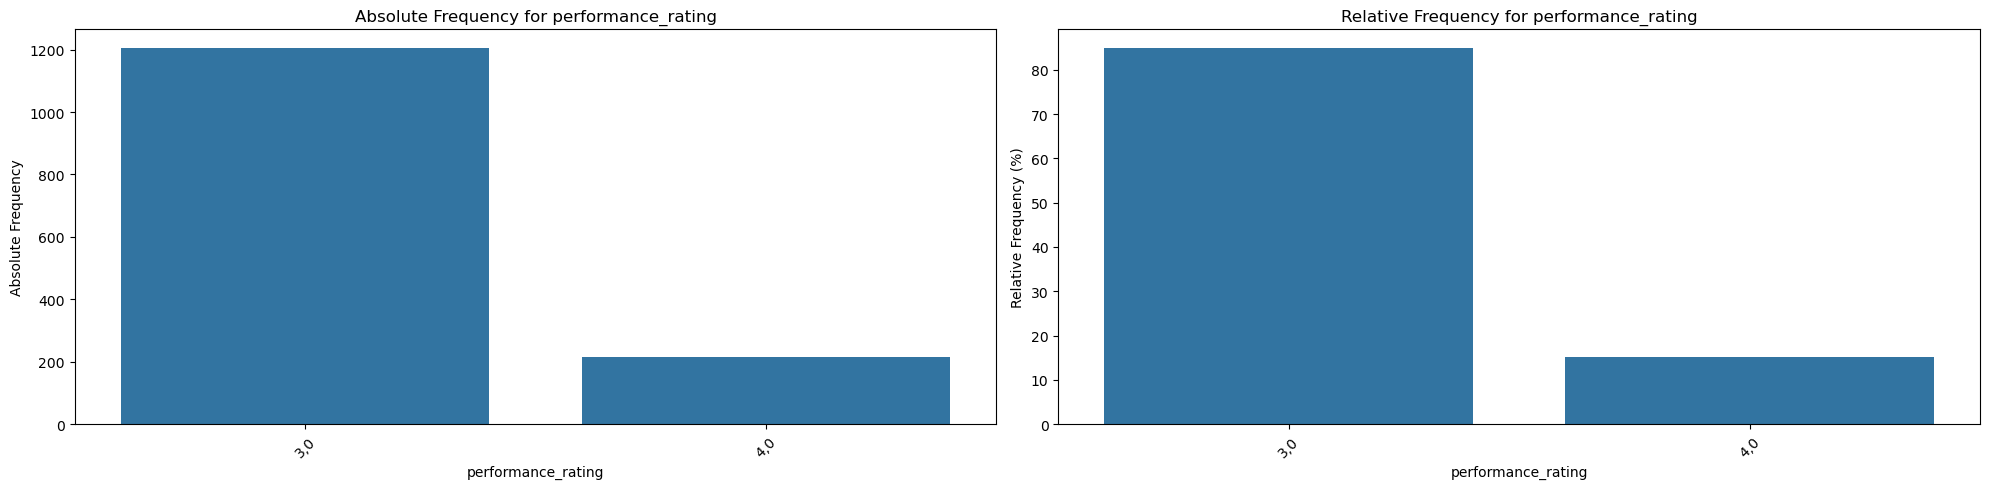

In [41]:
cat_plot(df, ['performance_rating'])

Imputamos los nulos con la moda en performance_rating porque tiene bajo porcentaje de nulos (12.08%) y la moda es determinante

In [31]:
df["standard_hours"].info()
print(df["standard_hours"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: standard_hours
Non-Null Count  Dtype 
--------------  ----- 
1276 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB
standard_hours
part_time    888
full_time    388
NaN          338
Name: count, dtype: int64


standard_hours
part_time    69.592476
full_time    30.407524
Name: proportion, dtype: float64


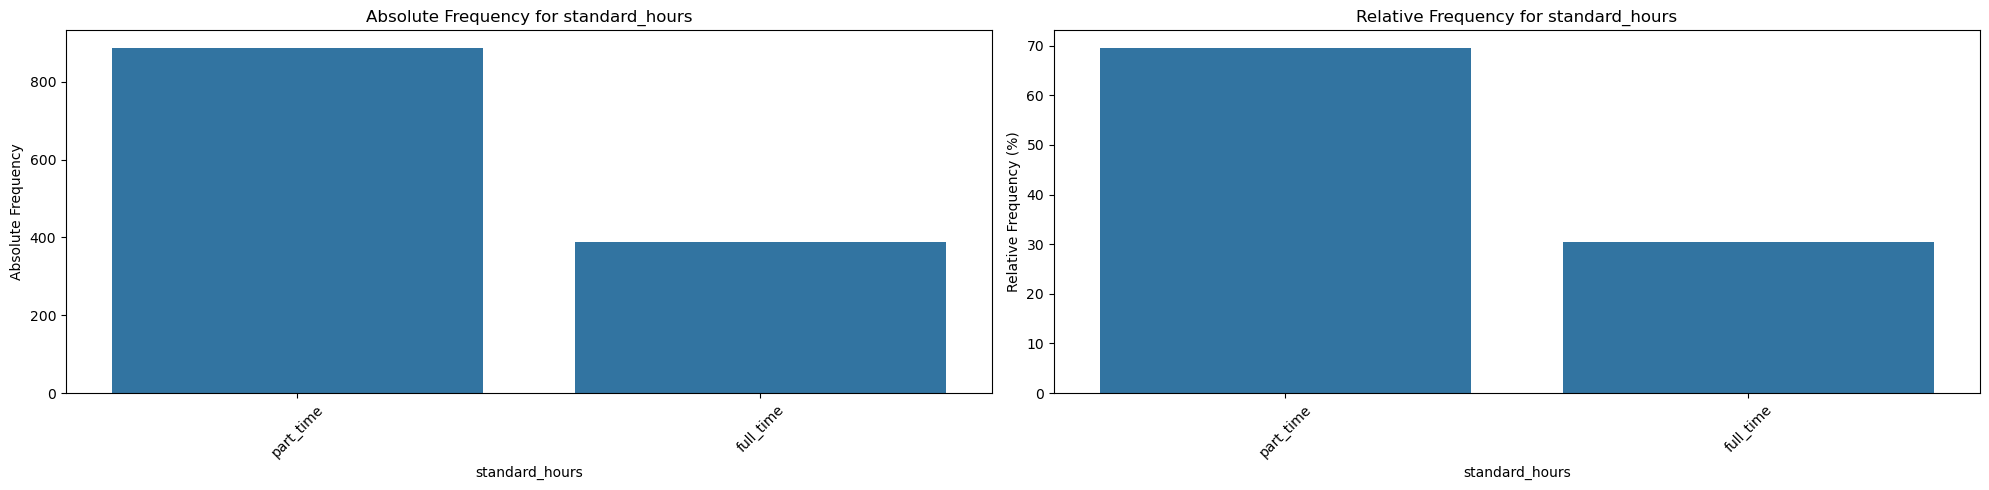

In [42]:
cat_plot(df, ['standard_hours'])

Imputamos los nulos con la moda en standard_hours porque tiene alto porcentaje de nulos (20.94%) y la moda es determinante

In [34]:
df["work_life_balance"].info()
print(df["work_life_balance"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: work_life_balance
Non-Null Count  Dtype 
--------------  ----- 
1506 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB
work_life_balance
good         913
low          359
excellent    155
NaN          108
very_low      79
Name: count, dtype: int64


work_life_balance
good         60.624170
low          23.837981
excellent    10.292165
very_low      5.245684
Name: proportion, dtype: float64


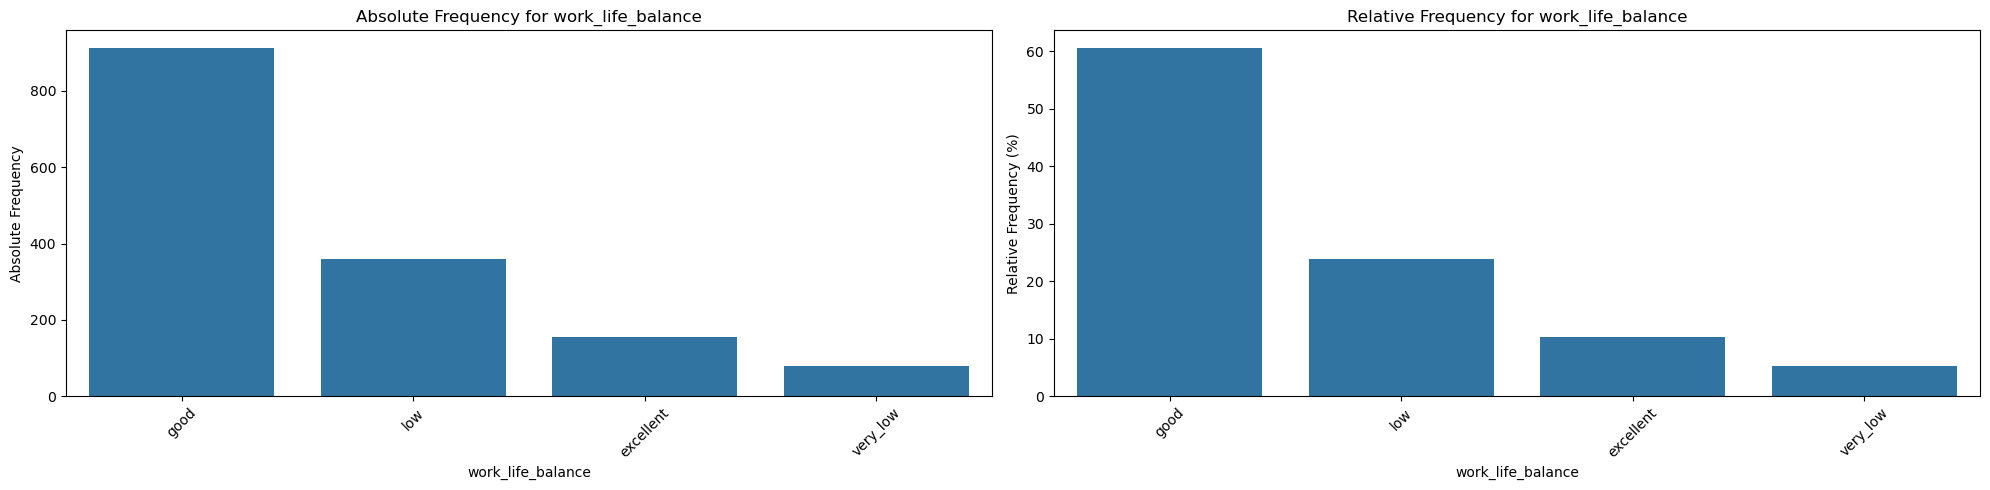

In [43]:
cat_plot(df, ['work_life_balance'])

Imputamos los nulos con la moda en work_life_balance porque tiene bajo porcentaje de nulos (6.7%) y la moda es determinante

In [ ]:
df["environment_satisfaction"].info()
print(df["environment_satisfaction"].value_counts(dropna=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: environment_satisfaction
Non-Null Count  Dtype 
--------------  ----- 
1514 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB
environment_satisfaction
very_high    460
high         459
low          298
medium       297
NaN          100
Name: count, dtype: int64


environment_satisfaction
very_high    30.383091
high         30.317041
low          19.682959
medium       19.616909
Name: proportion, dtype: float64


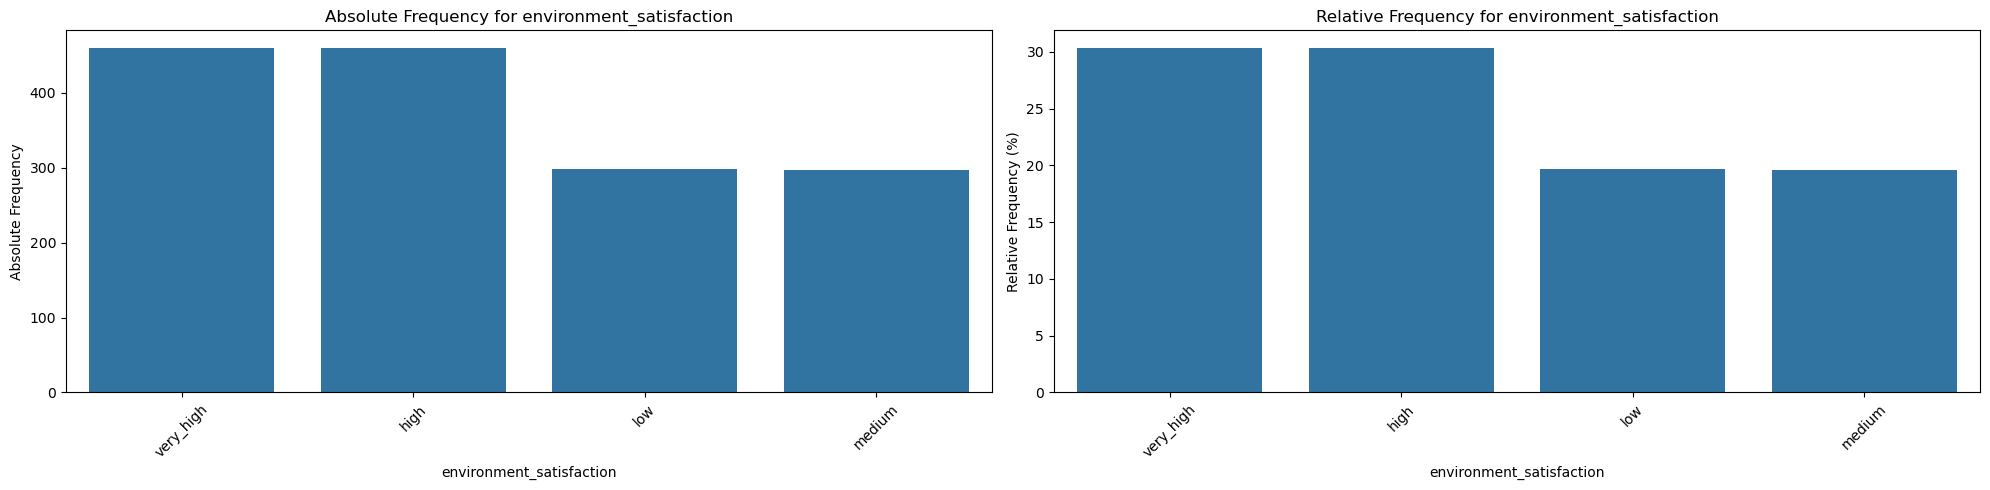

In [45]:
cat_plot(df, ['environment_satisfaction'])

Imputamos los nulos con la creación de una nueva categoría llamada 'NA' en environment_satisfaction porque tiene bajo porcentaje de nulos (6.2%) y la moda no es determinante

In [ ]:
## COLUMNAS NUMÉRICAS

In [ ]:
nulos_porcentaje = df.isnull().mean() * 100
print(nulos_porcentaje[nulos_porcentaje > 0].sort_values(ascending=False))

department                  81.288724
role_departament            81.288724
hourly_rate                 74.969021
business_travel             47.831475
education_field             46.158612
overtime                    41.883519
marital_status              40.334572
total_working_years         32.589839
monthly_income              28.996283
standard_hours              20.941760
salary                      16.976456
performance_rating          12.081784
work_life_balance            6.691450
environment_satisfaction     6.195787
dtype: float64


In [ ]:
df["hourly_rate"].describe()

count    404.000000
mean      83.042302
std       57.548806
min       13.010000
25%       36.250000
50%       69.530000
75%      114.160000
max      255.960000
Name: hourly_rate, dtype: float64

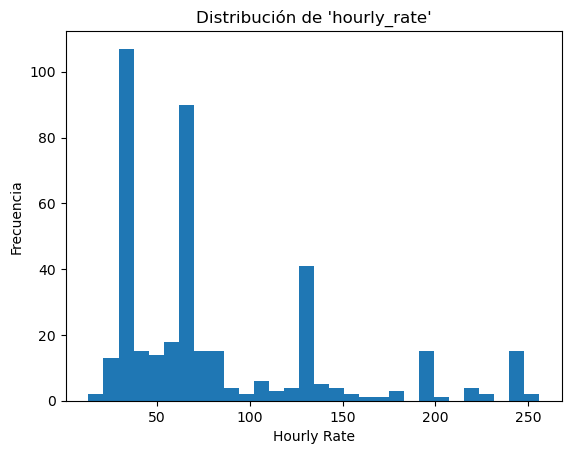

In [ ]:
# Histograma
plt.hist(df["hourly_rate"].dropna(), bins=30)
plt.title("Distribución de 'hourly_rate'")
plt.xlabel("Hourly Rate")
plt.ylabel("Frecuencia")
plt.show()

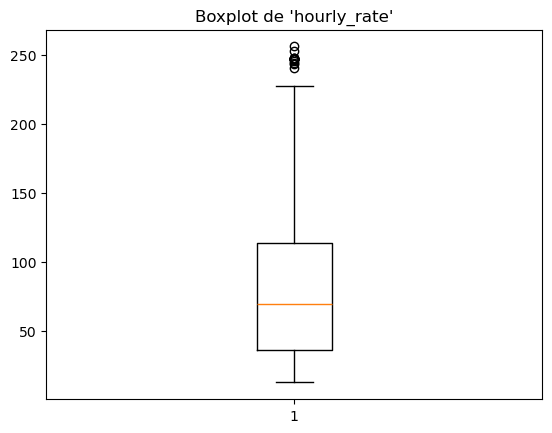

In [ ]:
# Boxplot
plt.boxplot(df["hourly_rate"].dropna())
plt.title("Boxplot de 'hourly_rate'")
plt.show()

## imputar los nulos en hourly_rate con técnicas más avanzadas porque tiene alto nivel de nulos (75%) 

In [ ]:
df["monthly_income"].describe()

count     1146.000000
mean      5697.600227
std       6234.554870
min       1000.000000
25%       2342.590000
50%       4492.840000
75%       7861.670000
max      94083.000000
Name: monthly_income, dtype: float64

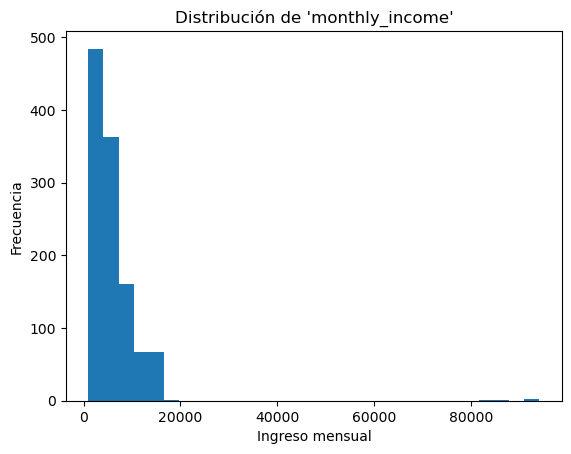

In [ ]:
# Histograma
plt.hist(df["monthly_income"].dropna(), bins=30)
plt.title("Distribución de 'monthly_income'")
plt.xlabel("Ingreso mensual")
plt.ylabel("Frecuencia")
plt.show()

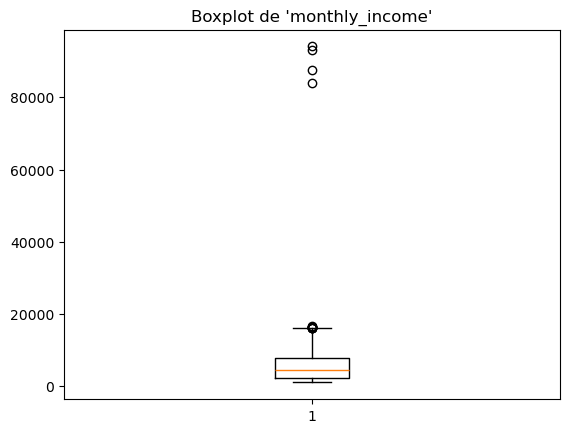

In [ ]:
# Boxplot
plt.boxplot(df["monthly_income"].dropna())
plt.title("Boxplot de 'monthly_income'")
plt.show()

Imputamos los nulos de monthly_income con métodos avanzados porque tiene un alto nivel de nulos (28,99%)

In [ ]:
df["total_working_years"].describe()

count    1088.000000
mean       11.318934
std         7.727675
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: total_working_years, dtype: float64

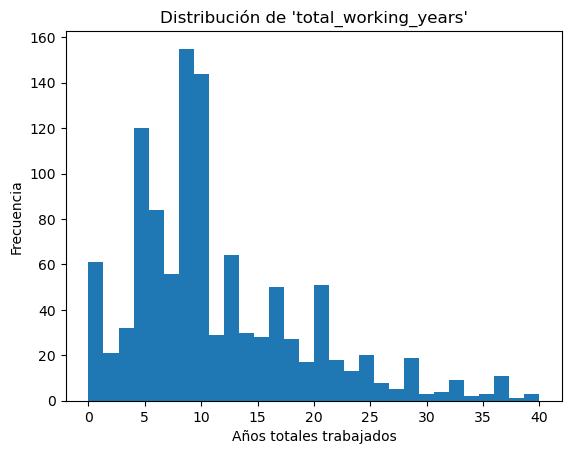

In [ ]:
# Histograma
plt.hist(df["total_working_years"].dropna(), bins=30)
plt.title("Distribución de 'total_working_years'")
plt.xlabel("Años totales trabajados")
plt.ylabel("Frecuencia")
plt.show()

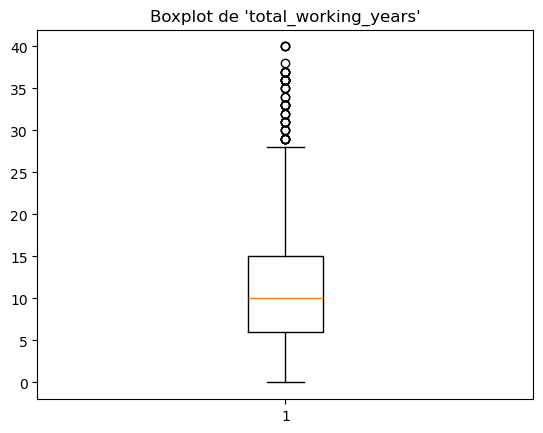

In [ ]:
# Boxplot
plt.boxplot(df["total_working_years"].dropna())
plt.title("Boxplot de 'total_working_years'")
plt.show()

Imputamos con métodos avanzados los nuloes de total_working_years. Además, tiene un alto nivel de nulos (32%) 

In [ ]:
df["salary"].describe()

count      1340.000000
mean      65245.875313
std       45933.029687
min       10090.000000
25%       28111.130000
50%       53914.110000
75%       94607.500000
max      199990.000000
Name: salary, dtype: float64

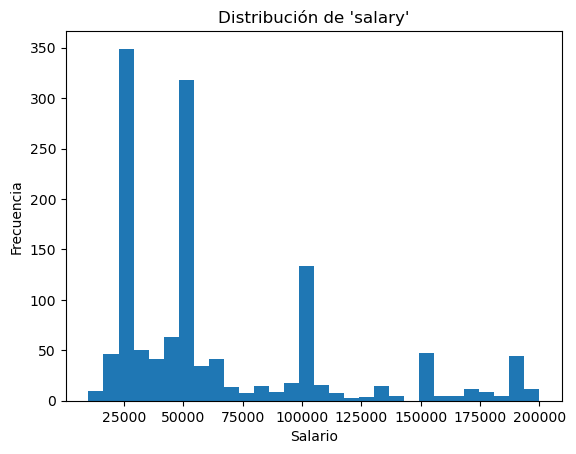

In [ ]:
# Histograma
plt.hist(df["salary"].dropna(), bins=30)
plt.title("Distribución de 'salary'")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.show()

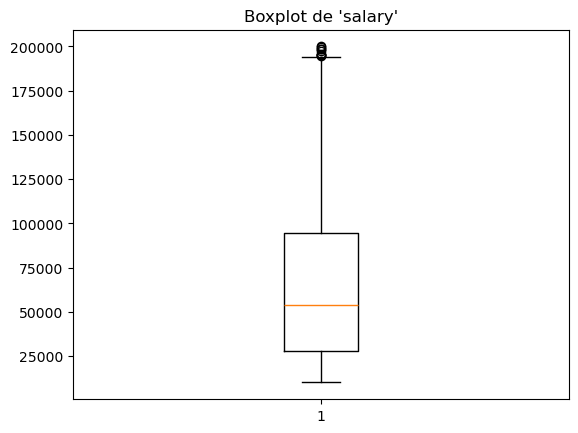

In [ ]:
# Boxplot
plt.boxplot(df["salary"].dropna())
plt.title("Boxplot de 'salary'")
plt.show()

Imputamos con métodos avanzados los nulos de salary porque es una variable continua con máximos locales. Tiene relativamente un bajo nivel de nulos (16,97%)

In [52]:
df.to_csv("df_final.csv", index=False)